# 1. Загрузка данных за май 2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lon_west = -74.25559
lon_east = -73.70001
lat_south = 40.49612
lat_north = 40.91553

In [3]:
raw_data = pd.read_csv('yellow_tripdata_2016-05.csv')

# 2. Фильтрация

In [4]:
input_size = raw_data.shape[0]

raw_data = raw_data[raw_data.tpep_pickup_datetime != raw_data.tpep_dropoff_datetime]
raw_data = raw_data[raw_data.passenger_count != 0]
raw_data = raw_data[raw_data.trip_distance != 0]

lat = (lat_south <= raw_data.pickup_latitude) & (raw_data.pickup_latitude <= lat_north)
lon = (lon_west <= raw_data.pickup_longitude) & (raw_data.pickup_longitude <= lon_east)
coor_ny = lat & lon
raw_data = raw_data[coor_ny]

output_size = raw_data.shape[0]
print(output_size / input_size)

0.9822307500143831


In [5]:
raw_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


# 3. Аггрегация

In [6]:
data = pd.DataFrame(raw_data[['tpep_pickup_datetime', 'pickup_longitude', 'pickup_latitude']])

In [7]:
def regions_function(x):
    d_lon = (lon_east - lon_west) / 50
    d_lat = (lat_north - lat_south) / 50
    return int(min((x[0] - lon_west) // d_lon, 49) * 50  + min((x[1] - lat_south) // d_lat, 49))

In [8]:
data['Region'] = data[['pickup_longitude', 'pickup_latitude']].apply(regions_function, axis=1)

In [9]:
data

,tpep_pickup_datetime,pickup_longitude,pickup_latitude,Region
0,2016-05-01 00:00:00,-73.985901,40.768040,1232
1,2016-05-01 00:00:00,-73.991577,40.744751,1179
2,2016-05-01 00:00:00,-73.993073,40.741573,1179
3,2016-05-01 00:00:00,-73.991943,40.684601,1172
4,2016-05-01 00:00:00,-74.005280,40.740192,1129
...,...,...,...,...
11836837,2016-05-31 23:53:01,-73.947876,40.774818,1383
11836838,2016-05-31 23:53:02,-73.789467,40.646942,2067
11836839,2016-05-31 23:53:02,-74.008659,40.719723,1126
11836840,2016-05-31 23:53:03,-73.981644,40.758862,1231


In [10]:
def time_function(x):
    hour = int(x[-8:-6])
    day = int(x[-11:-9]) - 1
    return day * 24 + hour # взaимнооднозначное отображение пары день-число

In [11]:
data['Time'] = data.tpep_pickup_datetime.apply(time_function)

In [12]:
data = pd.DataFrame(data[['Region', 'Time']])

In [13]:
data['count'] = 1

In [14]:
agg_data = data.groupby(['Region', 'Time']).agg('count')

# 4. Первые строки

In [15]:
agg_data.head(20)

count
Region Time       
14     469       1
15     536       1
24     85        1
26     699       1
31     17        1
       166       1
       419       1
       420       1
       421       2
       422       2
       423       1
       425       3
       426       2
       427       1
       428       1
       429       3
44     668       3
48     289       1
       388       2
       599       1

# 5. Empire State Building

In [16]:
esb_lat = 40.748817
esb_lon = -73.985428
esb_coor = (esb_lon, esb_lat)
esb_reg = regions_function(esb_coor)
print(esb_reg)

1230


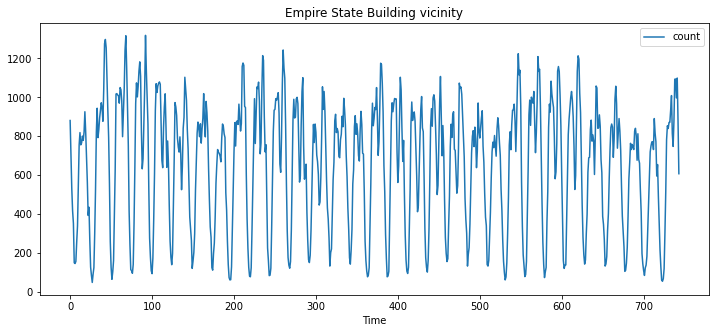

In [17]:
agg_data.loc[esb_reg].plot(figsize=(12, 5), title='Empire State Building vicinity');

# 6 Количество непредставленных пар область-час

In [18]:
# Если бы все пары были представлены, то для каждой из 50*50 областей было бы представлено 31*24 часа
max_number_of_pairs = 50*50*24*31
real_number_of_pairs = agg_data.shape[0]
print(f"Количество непредставленных пар: {max_number_of_pairs - real_number_of_pairs}")

Количество непредставленных пар: 1718238


#### Давайте представим их!

# 7 Окончательная таблица

In [19]:
new_index = pd.MultiIndex.from_tuples([(i, j) for i in range(2500) for j in range(24 * 31)], names=['Region', 'Time'])

clear_data = pd.DataFrame(new_index)
clear_data = clear_data.set_index(new_index)
clear_data[0] = 0
clear_data.columns = ['count']

clear_data = clear_data + agg_data
clear_data = clear_data.fillna(0)
clear_data = clear_data.apply(np.int_)

In [20]:
clear_data.head()

count
Region Time       
0      0         0
       1         0
       2         0
       3         0
       4         0

In [21]:
clear_data.loc[esb_reg]

,count
Time,
0,881
1,713
2,533
3,418
4,353
...,...
739,1094
740,997
741,1099
